In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [47]:
longterm_frgn = pd.read_csv('02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding = 'cp949')
food_waste_month = pd.read_csv('food_waste_month.csv', encoding = 'cp949')

In [5]:
longtermfrgn = longterm_frgn.copy()

y 데이터 업로드 및 전처리

In [128]:
food_waste_month

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt)
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,42453750,1271419
1662,2021-06,한경면,8031,27060150,809898
1663,2021-06,한림읍,25653,82746990,2476292
1664,2021-06,화북동,66088,110750050,3306029


In [129]:
food_waste_month['base_date'] = pd.to_datetime(food_waste_month['base_date'])
food_waste_month['year'] = food_waste_month['base_date'].dt.year
food_waste_month['month'] = food_waste_month['base_date'].dt.month

In [130]:
food_waste_month = food_waste_month[['year', 'month', 'emd_nm', 'sum(em_g)']]

In [131]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,42453750
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


<AxesSubplot:ylabel='Frequency'>

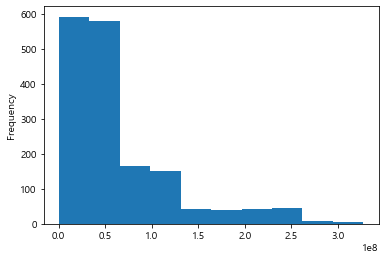

In [132]:
food_waste_month['sum(em_g)'].plot.hist()

In [133]:
food_waste_month['sum(em_g)'] = np.log(food_waste_month[['sum(em_g)']])

<ipython-input-133-d547f14c81c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_waste_month['sum(em_g)'] = np.log(food_waste_month[['sum(em_g)']])


<AxesSubplot:ylabel='Frequency'>

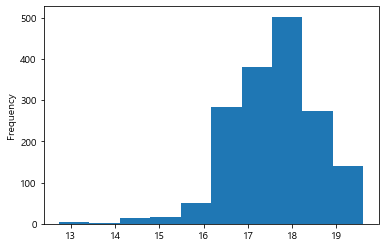

In [134]:
food_waste_month['sum(em_g)'].plot.hist()

In [135]:
scaler = StandardScaler()
food_waste_month['sum(em_g)'] = scaler.fit_transform(food_waste_month[['sum(em_g)']])

<ipython-input-135-33732fef6645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_waste_month['sum(em_g)'] = scaler.fit_transform(food_waste_month[['sum(em_g)']])


In [136]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,0.1
1,2018,1,남원읍,-0.0
2,2018,1,노형동,1.9
3,2018,1,대륜동,0.3
4,2018,1,대정읍,-0.1
...,...,...,...,...
1661,2021,6,표선면,-0.0
1662,2021,6,한경면,-0.5
1663,2021,6,한림읍,0.7
1664,2021,6,화북동,1.0


long_term데이터 업로드 및 전처리

In [48]:
longterm_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0000,0.0000,3.3558,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0000,0.0000,12.2655,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.0624,0.0000,0.0000,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0000,0.0000,26.4749,그외


In [49]:
longterm_frgn['base_date'] = pd.to_datetime(longterm_frgn['base_date'], errors="ignore")
longterm_frgn['year'] = longterm_frgn['base_date'].dt.year
longterm_frgn['month'] = longterm_frgn['base_date'].dt.month

In [50]:
longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm', 'time', 'nationality'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

<ipython-input-50-0ee31e9de7a2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm', 'time', 'nationality'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()


In [51]:
longterm_frgn

,year,month,emd_nm,time,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,건입동,1,AUS,0.0000,0.0000,5.6586
1,2018,1,건입동,1,BGD,0.0000,0.0000,6.4670
2,2018,1,건입동,1,CAN,0.0000,0.0000,30.2977
3,2018,1,건입동,1,CHN,1723.8665,245.5062,1338.1190
4,2018,1,건입동,1,ETC,108.4807,0.0000,40.6825
...,...,...,...,...,...,...,...,...
1032008,2021,6,효돈동,24,NPL,41.4918,0.0000,14.8186
1032009,2021,6,효돈동,24,PHL,99.4170,0.0000,76.2197
1032010,2021,6,효돈동,24,RUS,0.0000,0.0000,70.4928
1032011,2021,6,효돈동,24,USA,0.0000,0.0000,13.2375


In [52]:
longterm_frgn.loc[:, ['time','resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].corr()

,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,1.000000,-0.022577,0.015623,0.018315
resd_pop_cnt,-0.022577,1.000000,0.752502,0.763955
work_pop_cnt,0.015623,0.752502,1.000000,0.718826
visit_pop_cnt,0.018315,0.763955,0.718826,1.000000


In [53]:
# resd_pop_cnt와 work_pop_cnt, visit_pop_cnt의 상관관계가 높기 때문에 resd_pop_cnt의 데이터만 사용한다 

In [54]:
longterm_frgn = longterm_frgn.drop(['work_pop_cnt', 'visit_pop_cnt'], axis = 1)

In [55]:
longterm_frgn

,year,month,emd_nm,time,nationality,resd_pop_cnt
0,2018,1,건입동,1,AUS,0.0000
1,2018,1,건입동,1,BGD,0.0000
2,2018,1,건입동,1,CAN,0.0000
3,2018,1,건입동,1,CHN,1723.8665
4,2018,1,건입동,1,ETC,108.4807
...,...,...,...,...,...,...
1032008,2021,6,효돈동,24,NPL,41.4918
1032009,2021,6,효돈동,24,PHL,99.4170
1032010,2021,6,효돈동,24,RUS,0.0000
1032011,2021,6,효돈동,24,USA,0.0000


In [56]:
longterm_frgn1 = longterm_frgn.copy()
longterm_frgn2 = longterm_frgn.copy()
longterm_frgn3 = longterm_frgn.copy()

## 더미 변수 처리 

In [57]:
# 시간 더미 변수 

In [58]:
longterm_frgn1 = pd.get_dummies(longterm_frgn1, columns = ['time'])

In [59]:
longterm_frgn1['1am_cnt'] = longterm_frgn1['time_1'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2am_cnt'] = longterm_frgn1['time_2'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3am_cnt'] = longterm_frgn1['time_3'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4am_cnt'] = longterm_frgn1['time_4'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5am_cnt'] = longterm_frgn1['time_5'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6am_cnt'] = longterm_frgn1['time_6'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7am_cnt'] = longterm_frgn1['time_7'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8am_cnt'] = longterm_frgn1['time_8'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9am_cnt'] = longterm_frgn1['time_9'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10am_cnt'] = longterm_frgn1['time_10'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11am_cnt'] = longterm_frgn1['time_11'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12pm_cnt'] = longterm_frgn1['time_12'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['1pm_cnt'] = longterm_frgn1['time_13'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2pm_cnt'] = longterm_frgn1['time_14'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3pm_cnt'] = longterm_frgn1['time_15'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4pm_cnt'] = longterm_frgn1['time_16'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5pm_cnt'] = longterm_frgn1['time_17'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6pm_cnt'] = longterm_frgn1['time_18'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7pm_cnt'] = longterm_frgn1['time_19'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8pm_cnt'] = longterm_frgn1['time_20'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9pm_cnt'] = longterm_frgn1['time_21'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10pm_cnt'] = longterm_frgn1['time_22'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11pm_cnt'] = longterm_frgn1['time_23'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12am_cnt'] = longterm_frgn1['time_24'] * longterm_frgn1['resd_pop_cnt']

In [60]:
longterm_frgn1

,year,month,emd_nm,nationality,resd_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,AUS,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,2018,1,건입동,BGD,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,2018,1,건입동,CAN,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,2018,1,건입동,CHN,1723.8665,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1723.8665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,2018,1,건입동,ETC,108.4807,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108.4807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032008,2021,6,효돈동,NPL,41.4918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.4918
1032009,2021,6,효돈동,PHL,99.4170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.4170
1032010,2021,6,효돈동,RUS,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1032011,2021,6,효돈동,USA,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [61]:
longterm_frgn1 = longterm_frgn1.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt','5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', 
                                                                   '2pm_cnt','3pm_cnt', '4pm_cnt', '5pm_cnt', '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt'].sum().reset_index()

<ipython-input-61-8e28463974f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  longterm_frgn1 = longterm_frgn1.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt','5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt',


In [62]:
longterm_frgn1

,year,month,emd_nm,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,5524.1063,5509.0290,5472.0863,5450.6603,5421.8114,5218.8648,4963.6550,4788.2358,4303.4613,4001.0681,3811.2874,3626.6950,3388.1390,3320.7182,3398.8084,3285.8827,3348.7156,3201.6746,3422.3829,3595.6255,3588.7183,3725.0230,3950.3129,5487.4810
1,2018,1,구좌읍,9810.1336,9824.3834,9810.4177,9814.4833,9797.0216,9775.7094,9676.4469,9554.8005,9471.0789,9047.4323,9011.2126,8805.2750,8775.3469,8732.5335,8673.1843,8752.1786,8814.1475,8901.8563,8738.2893,8757.2051,8822.1707,9011.9410,9255.3598,9736.7756
2,2018,1,남원읍,9551.2555,9550.1712,9538.8017,9494.3105,9541.7339,9492.0695,9390.4778,9220.9663,9039.5247,8965.5941,8766.6030,8687.4417,8603.0601,8594.5833,8497.9128,8387.6269,8294.2151,8358.1209,8418.4285,8398.0920,8564.1075,8699.6678,8763.1093,9569.1687
3,2018,1,노형동,68633.7975,69575.7056,69636.8964,69776.6199,69489.2728,69241.6527,68517.5925,66586.6532,62644.6584,57139.8326,53399.4247,51296.3887,48764.0105,47203.9469,46656.1792,46669.1123,47146.4491,48387.5943,51326.2993,53154.6159,54495.5675,55432.1599,57731.4132,68259.3902
4,2018,1,대륜동,5621.2940,5602.0782,5562.9411,5573.7536,5560.7543,5524.9187,5302.5699,5005.5090,4823.3870,4572.3351,4398.7346,4174.5376,4029.2257,3935.2795,3899.2405,3801.0286,3986.0420,3864.5132,3977.8272,4123.2279,4225.1640,4301.7919,4390.5798,5697.1854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,5710.4792,5718.0822,5716.1862,5693.4729,5696.8288,5663.2253,5634.2714,5296.2720,5198.1418,5100.8621,5036.3174,5005.4082,4959.4888,4881.4042,4941.4617,5012.8488,5191.7954,5300.8950,5216.2446,5172.3518,5275.3355,5335.5744,5316.6326,5677.0801
1802,2021,6,한경면,9956.8210,9939.8281,9927.4830,9906.3966,9826.4800,9559.3273,9276.6555,8198.8228,7855.5475,7412.0566,7171.3321,7071.5245,7111.7976,6953.0566,6795.4371,6860.0718,7095.3866,7456.1419,7546.5149,7696.7215,7844.0593,7989.1056,8061.7116,9936.7912
1803,2021,6,한림읍,35071.3653,35114.1568,35132.6942,35132.2457,35136.0748,35093.6009,35105.7680,33668.2858,33109.7055,32689.1664,32408.7433,31865.6927,31768.8407,31905.1929,31582.6073,30674.4889,31073.2105,31902.9689,32129.7148,32631.2433,32673.3753,32955.4055,33170.5517,34882.0857
1804,2021,6,화북동,9400.4088,9416.2716,9440.7436,9434.7826,9438.2600,9349.1179,8788.7104,8365.1568,7591.1315,7110.8779,6729.7371,6838.6004,6713.2707,6319.3519,6135.2515,6029.1656,6372.9328,7103.1802,7812.9951,7980.5673,8126.0839,8159.8959,8306.7298,9373.3205


In [63]:
longterm_frgn1[['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt', '5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt'
                                   , '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', '2pm_cnt', '3pm_cnt', '4pm_cnt', '5pm_cnt',
                                   '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt']].corr().head()

,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
1am_cnt,1.000000,0.999986,0.999963,0.999943,0.999921,0.999859,0.999560,0.998907,0.997682,0.995904,0.994637,0.994136,0.993360,0.992677,0.992441,0.992844,0.993361,0.993761,0.994227,0.994408,0.994543,0.994716,0.994872,0.999940
2am_cnt,0.999986,1.000000,0.999991,0.999979,0.999963,0.999907,0.999616,0.999010,0.997768,0.995948,0.994676,0.994179,0.993400,0.992714,0.992474,0.992886,0.993422,0.993823,0.994323,0.994536,0.994688,0.994882,0.995091,0.999897
3am_cnt,0.999963,0.999991,1.000000,0.999994,0.999983,0.999931,0.999643,0.999066,0.997803,0.995946,0.994667,0.994173,0.993386,0.992699,0.992456,0.992872,0.993426,0.993840,0.994373,0.994612,0.994778,0.994989,0.995237,0.999850
4am_cnt,0.999943,0.999979,0.999994,1.000000,0.999992,0.999945,0.999665,0.999111,0.997846,0.995979,0.994699,0.994202,0.993407,0.992722,0.992475,0.992890,0.993446,0.993852,0.994391,0.994643,0.994815,0.995032,0.995301,0.999816
5am_cnt,0.999921,0.999963,0.999983,0.999992,1.000000,0.999959,0.999686,0.999157,0.997908,0.996047,0.994777,0.994285,0.993501,0.992819,0.992568,0.992982,0.993539,0.993946,0.994485,0.994740,0.994914,0.995133,0.995416,0.999782


- 모든 시간이 매우 높은 상관관계를 가지고 있다. 

In [31]:
# 국적 더미변수 

In [64]:
longterm_frgn2 = pd.get_dummies(longterm_frgn2, columns = ['nationality'])

In [65]:
longterm_frgn2

,year,month,emd_nm,time,resd_pop_cnt,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM
0,2018,1,건입동,1,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,1,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,1,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,1,1723.8665,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,1,108.4807,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032008,2021,6,효돈동,24,41.4918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1032009,2021,6,효돈동,24,99.4170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1032010,2021,6,효돈동,24,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1032011,2021,6,효돈동,24,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
longterm_frgn2['AUS_cnt'] = longterm_frgn2['nationality_AUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['BGD_cnt'] = longterm_frgn2['nationality_BGD'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CAN_cnt'] = longterm_frgn2['nationality_CAN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CHN_cnt'] = longterm_frgn2['nationality_CHN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['DEU_cnt'] = longterm_frgn2['nationality_DEU'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['ETC_cnt'] = longterm_frgn2['nationality_ETC'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['FRA_cnt'] = longterm_frgn2['nationality_FRA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['GBR_cnt'] = longterm_frgn2['nationality_GBR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IDN_cnt'] = longterm_frgn2['nationality_IDN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IND_cnt'] = longterm_frgn2['nationality_IND'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['JPN_cnt'] = longterm_frgn2['nationality_JPN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KAZ_cnt'] = longterm_frgn2['nationality_KAZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KGZ_cnt'] = longterm_frgn2['nationality_KGZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KHM_cnt'] = longterm_frgn2['nationality_KHM'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['LKA_cnt'] = longterm_frgn2['nationality_LKA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MGL_cnt'] = longterm_frgn2['nationality_MGL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MMR_cnt'] = longterm_frgn2['nationality_MMR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MYS_cnt'] = longterm_frgn2['nationality_MYS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NPL_cnt'] = longterm_frgn2['nationality_NPL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NZL_cnt'] = longterm_frgn2['nationality_NZL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PAK_cnt'] = longterm_frgn2['nationality_PAK'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PHL_cnt'] = longterm_frgn2['nationality_PHL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['RUS_cnt'] = longterm_frgn2['nationality_RUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['THA_cnt'] = longterm_frgn2['nationality_THA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['TWN_cnt'] = longterm_frgn2['nationality_TWN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UKR_cnt'] = longterm_frgn2['nationality_UKR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['USA_cnt'] = longterm_frgn2['nationality_USA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UZB_cnt'] = longterm_frgn2['nationality_UZB'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['VNM_cnt'] = longterm_frgn2['nationality_VNM'] * longterm_frgn2['resd_pop_cnt']

In [67]:
longterm_frgn2

,year,month,emd_nm,time,resd_pop_cnt,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,1,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,2018,1,건입동,1,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,2018,1,건입동,1,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,2018,1,건입동,1,1723.8665,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1723.8665,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,2018,1,건입동,1,108.4807,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,108.4807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032008,2021,6,효돈동,24,41.4918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.4918,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1032009,2021,6,효돈동,24,99.4170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,99.417,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1032010,2021,6,효돈동,24,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1032011,2021,6,효돈동,24,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [68]:
longterm_frgn2 = longterm_frgn2.groupby(['year', 'month', 'emd_nm'])['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt'].sum().reset_index()

<ipython-input-68-7fb8e294ae61>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  longterm_frgn2 = longterm_frgn2.groupby(['year', 'month', 'emd_nm'])['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',


In [69]:
longterm_frgn2

,year,month,emd_nm,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,0.0000,0.000,0.0000,2.930189e+04,0.0000,1082.1374,0.0000,0.0000,19202.5362,0.0000,6112.1112,0.0,0.0,0.0000,5896.4162,0.0000,631.6296,0.0,4668.3935,0.0000,0.000,6598.8492,0.0000,0.0000,7572.7845,0.0,1591.5801,0.0000,19146.1103
1,2018,1,구좌읍,0.0000,0.000,1225.3715,6.272187e+04,0.0000,0.0000,0.0000,0.0000,17382.4063,0.0000,2753.8385,0.0,0.0,18215.9307,22361.6347,0.0000,4364.4379,0.0,37326.9236,0.0000,0.000,14050.7858,3599.0668,4623.8665,0.0000,0.0,4995.9904,3359.0640,24388.1983
2,2018,1,남원읍,0.0000,0.000,0.0000,4.162279e+04,0.0000,0.0000,0.0000,0.0000,34150.7049,0.0000,0.0000,0.0,0.0,22491.4838,43569.4815,0.0000,4062.3581,0.0,31322.6448,0.0000,0.000,14523.8228,0.0000,0.0000,0.0000,0.0,253.6469,0.0000,22390.1123
3,2018,1,노형동,11855.9924,0.000,33478.3141,1.037619e+06,0.0000,14607.8193,1587.3216,2595.3553,953.1589,0.0000,26857.8155,0.0,0.0,19608.6107,3470.9789,11185.2103,2805.9870,0.0,10325.6603,0.0000,0.000,5608.5013,4953.1242,7189.3341,28256.7489,0.0,38468.1249,2067.2869,137670.6870
4,2018,1,대륜동,2701.0357,0.000,4561.4983,4.789321e+04,1271.6304,8148.4021,0.0000,2768.6814,0.0000,0.0000,3908.9557,0.0,0.0,5465.3049,0.0000,0.0000,0.0000,0.0,0.0000,3153.1699,0.000,3869.4986,2319.2201,0.0000,9250.4552,0.0,16642.8563,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,0.0000,0.000,0.0000,5.368245e+04,0.0000,4713.2540,0.0000,0.0000,12582.5631,0.0000,0.0000,0.0,0.0,4355.9460,13478.1711,2641.2932,1878.6960,0.0,10224.8998,0.0000,3554.555,7068.6205,0.0000,3483.3522,0.0000,0.0,4377.2000,3063.1032,2646.5554
1802,2021,6,한경면,5543.1816,0.000,1261.3644,5.307981e+04,2704.2393,5315.3114,0.0000,11814.1550,17118.3739,701.5175,2347.3528,0.0,0.0,5349.6360,17864.3133,0.0000,785.3993,0.0,8375.5307,377.5178,0.000,3708.2949,0.0000,0.0000,0.0000,0.0,15103.9395,649.4832,45349.6490
1803,2021,6,한림읍,1210.6746,874.571,7198.3878,2.092955e+05,0.0000,12121.4474,2211.9168,2890.3860,258025.0936,5341.4048,0.0000,0.0,0.0,34049.4934,17025.4542,11978.9645,18693.3689,0.0,44589.4813,0.0000,0.000,21732.7985,2410.1824,21893.4367,0.0000,0.0,28186.9712,0.0000,97147.6156
1804,2021,6,화북동,0.0000,0.000,4714.5441,8.250979e+04,0.0000,7565.8698,1808.8416,0.0000,0.0000,2716.6314,14545.9181,0.0,0.0,7721.4600,4698.3633,3053.4413,3843.5535,0.0,8980.1426,0.0000,0.000,17249.0453,1097.6736,0.0000,0.0000,0.0,5515.6250,7600.7088,13436.5104


In [70]:
longtermfrgn_nation = longterm_frgn2.copy()

In [71]:
longterm_frgn2[['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt']].corr()

,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
AUS_cnt,1.000000,0.389295,0.757381,0.327746,0.214900,0.641458,0.596706,0.759058,0.113142,0.363241,0.281614,0.009489,0.107921,0.280613,0.226248,0.376148,0.122956,0.513213,0.213846,0.649709,0.222570,0.089956,0.077532,0.364911,0.614048,0.056146,0.739564,0.141446,0.459745
BGD_cnt,0.389295,1.000000,0.188699,0.465905,0.039181,0.372902,0.283738,-0.010207,-0.027057,0.551637,0.457650,0.019838,0.257585,0.137557,0.100842,0.435237,0.104301,0.156354,0.393765,0.030291,0.539283,0.138721,0.371600,0.098497,0.347333,0.117382,0.110630,0.194000,0.455017
CAN_cnt,0.757381,0.188699,1.000000,0.354756,0.102977,0.748736,0.469003,0.860421,0.074574,0.223980,0.313035,0.067087,0.043901,0.186000,0.080576,0.244861,0.063090,0.707523,0.159149,0.867362,0.091748,0.165205,0.118029,0.370983,0.507306,0.080995,0.937320,0.208899,0.333309
CHN_cnt,0.327746,0.465905,0.354756,1.000000,0.131812,0.604691,0.282493,0.171408,0.073307,0.258051,0.608144,0.262231,0.383801,0.247753,0.086257,0.717046,0.283686,0.369832,0.533351,0.158144,0.172783,0.327060,0.742483,0.226173,0.665571,0.162719,0.284781,0.200636,0.502107
DEU_cnt,0.214900,0.039181,0.102977,0.131812,1.000000,0.205063,0.140814,0.206829,0.080710,0.010745,0.066893,0.007449,-0.060886,0.041727,0.016139,0.136772,-0.026813,0.101617,0.040913,0.201345,-0.038605,0.097720,0.102401,0.072161,0.158598,-0.031986,0.157723,-0.028523,0.136576
ETC_cnt,0.641458,0.372902,0.748736,0.604691,0.205063,1.000000,0.534028,0.617358,0.217522,0.296701,0.491678,0.146463,0.240840,0.370202,0.234803,0.519154,0.252864,0.576275,0.426378,0.640358,0.192753,0.427280,0.319183,0.475168,0.627683,0.138185,0.710264,0.217977,0.495896
FRA_cnt,0.596706,0.283738,0.469003,0.282493,0.140814,0.534028,1.000000,0.466754,0.134837,0.057281,0.237057,0.070552,0.167804,0.309933,0.218015,0.321967,0.180484,0.342524,0.379801,0.386508,-0.058985,0.242977,0.027868,0.261750,0.510968,-0.044166,0.505760,0.171254,0.300997
GBR_cnt,0.759058,-0.010207,0.860421,0.171408,0.206829,0.617358,0.466754,1.000000,0.129348,0.142235,0.089225,0.032597,-0.034481,0.122588,0.168741,0.162117,-0.004607,0.600867,-0.008204,0.882275,-0.014053,0.052812,-0.016908,0.361677,0.479131,-0.019377,0.911892,0.126526,0.181302
IDN_cnt,0.113142,-0.027057,0.074574,0.073307,0.080710,0.217522,0.134837,0.129348,1.000000,0.039881,-0.000083,0.061463,0.085041,0.576388,0.458878,0.393070,0.331292,-0.020698,0.421868,0.103929,-0.024953,0.343158,0.028265,0.747111,0.058127,0.040043,0.171687,-0.023553,0.542000
IND_cnt,0.363241,0.551637,0.223980,0.258051,0.010745,0.296701,0.057281,0.142235,0.039881,1.000000,0.567399,0.000146,0.138642,0.063978,0.298201,0.410989,0.093363,0.046593,0.063919,0.113615,0.910516,0.152092,0.258107,0.124659,0.152952,0.133067,0.169359,0.188979,0.424613


In [72]:
longterm_frgn2['ETC_resd_pop_cnt'] = longterm_frgn2['TWN_cnt'] + longterm_frgn2['VNM_cnt'] + longterm_frgn2['AUS_cnt'] + longterm_frgn2['CAN_cnt'] + longterm_frgn2['CHN_cnt'] + longterm_frgn2['ETC_cnt'] + longterm_frgn2['GBR_cnt'] + longterm_frgn2['IDN_cnt'] + longterm_frgn2['IND_cnt'] + longterm_frgn2['MGL_cnt'] + longterm_frgn2['MYS_cnt'] +  longterm_frgn2['NZL_cnt'] +  longterm_frgn2['PAK_cnt'] + longterm_frgn2['RUS_cnt'] + longterm_frgn2['THA_cnt'] + longterm_frgn2['USA_cnt']   

In [73]:
longterm_frgn2 = longterm_frgn2.loc[:, ['year', 'month', 'emd_nm', 'BGD_cnt', 'DEU_cnt', 'FRA_cnt', 'JPN_cnt', 'KAZ_cnt', 'KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_resd_pop_cnt']]

In [74]:
longterm_frgn2

,year,month,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_resd_pop_cnt
0,2018,1,건입동,0.000,0.0000,0.0000,6112.1112,0.0,0.0,0.0000,5896.4162,631.6296,4668.3935,6598.8492,0.0,0.0000,7.789704e+04
1,2018,1,구좌읍,0.000,0.0000,0.0000,2753.8385,0.0,0.0,18215.9307,22361.6347,4364.4379,37326.9236,14050.7858,0.0,3359.0640,1.189368e+05
2,2018,1,남원읍,0.000,0.0000,0.0000,0.0000,0.0,0.0,22491.4838,43569.4815,4062.3581,31322.6448,14523.8228,0.0,0.0000,9.841725e+04
3,2018,1,노형동,0.000,0.0000,1587.3216,26857.8155,0.0,0.0,19608.6107,3470.9789,2805.9870,10325.6603,5608.5013,0.0,2067.2869,1.328833e+06
4,2018,1,대륜동,0.000,1271.6304,0.0000,3908.9557,0.0,0.0,5465.3049,0.0000,0.0000,0.0000,3869.4986,0.0,0.0000,9.743853e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,0.000,0.0000,0.0000,0.0000,0.0,0.0,4355.9460,13478.1711,1878.6960,10224.8998,7068.6205,0.0,3063.1032,8.768122e+04
1802,2021,6,한경면,0.000,2704.2393,0.0000,2347.3528,0.0,0.0,5349.6360,17864.3133,785.3993,8375.5307,3708.2949,0.0,649.4832,1.556648e+05
1803,2021,6,한림읍,874.571,0.0000,2211.9168,0.0000,0.0,0.0,34049.4934,17025.4542,18693.3689,44589.4813,21732.7985,0.0,0.0000,6.577001e+05
1804,2021,6,화북동,0.000,0.0000,1808.8416,14545.9181,0.0,0.0,7721.4600,4698.3633,3843.5535,8980.1426,17249.0453,0.0,7600.7088,1.206101e+05


In [75]:
longterm_frgn2['resd_pop_time'] = longterm_frgn1['1am_cnt']

In [76]:
longtermfrgn_final = longterm_frgn2.copy()

<AxesSubplot:>

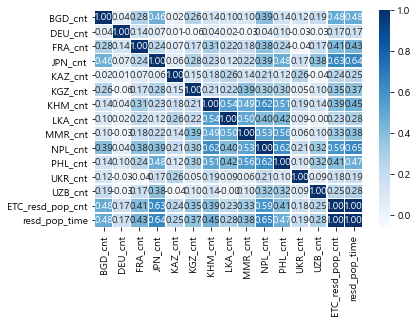

In [77]:
sns.heatmap(data=longtermfrgn_final.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [78]:
longtermfrgn_final.drop(['year', 'month', 'emd_nm'], axis=1).corr()

,BGD_cnt,DEU_cnt,FRA_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_resd_pop_cnt,resd_pop_time
BGD_cnt,1.000000,0.039181,0.283738,0.457650,0.019838,0.257585,0.137557,0.100842,0.104301,0.393765,0.138721,0.117382,0.194000,0.483510,0.484626
DEU_cnt,0.039181,1.000000,0.140814,0.066893,0.007449,-0.060886,0.041727,0.016139,-0.026813,0.040913,0.097720,-0.031986,-0.028523,0.173704,0.172351
FRA_cnt,0.283738,0.140814,1.000000,0.237057,0.070552,0.167804,0.309933,0.218015,0.180484,0.379801,0.242977,-0.044166,0.171254,0.410712,0.434749
JPN_cnt,0.457650,0.066893,0.237057,1.000000,0.062371,0.276334,0.225160,0.116530,0.215443,0.386966,0.477063,0.168362,0.378875,0.632747,0.644112
KAZ_cnt,0.019838,0.007449,0.070552,0.062371,1.000000,0.145172,0.176627,0.256968,0.136288,0.205153,0.123832,0.263661,-0.037170,0.238099,0.249673
KGZ_cnt,0.257585,-0.060886,0.167804,0.276334,0.145172,1.000000,0.206493,0.218553,0.389711,0.304271,0.303257,0.053971,0.100602,0.351654,0.366947
KHM_cnt,0.137557,0.041727,0.309933,0.225160,0.176627,0.206493,1.000000,0.543240,0.487030,0.622745,0.512902,0.191538,0.144826,0.393200,0.448213
LKA_cnt,0.100842,0.016139,0.218015,0.116530,0.256968,0.218553,0.543240,1.000000,0.499528,0.404777,0.417383,0.092150,-0.002810,0.230167,0.281725
MMR_cnt,0.104301,-0.026813,0.180484,0.215443,0.136288,0.389711,0.487030,0.499528,1.000000,0.526083,0.560441,0.058846,0.104418,0.329890,0.381663
NPL_cnt,0.393765,0.040913,0.379801,0.386966,0.205153,0.304271,0.622745,0.404777,0.526083,1.000000,0.622689,0.206215,0.324631,0.586106,0.645398


In [79]:
longterm_frgn_final = longterm_frgn2.drop('resd_pop_time', axis = 1)

In [80]:
longterm_frgn_final.to_csv('longterm_frgn.csv', encoding = 'cp949', index = None)

<AxesSubplot:ylabel='Frequency'>

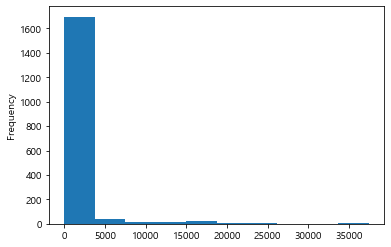

In [81]:
longterm_frgn2['BGD_cnt'].plot.hist()

In [82]:
longterm_frgn2['BGD_cnt'].describe()

count     1806.000000
mean       862.330128
std       3604.875548
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      37459.292800
Name: BGD_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

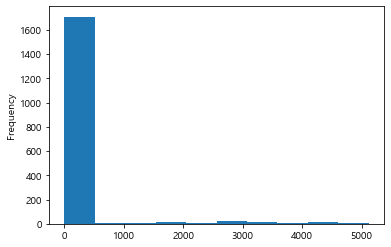

In [83]:
longterm_frgn2['DEU_cnt'].plot.hist()

In [84]:
longterm_frgn2['DEU_cnt'].describe()

count    1806.000000
mean      150.170339
std       677.829688
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5122.340700
Name: DEU_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

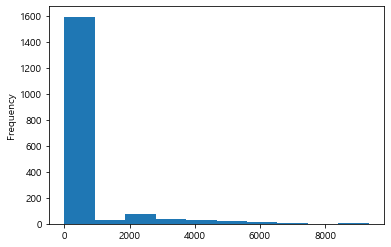

In [85]:
longterm_frgn2['FRA_cnt'].plot.hist()

In [86]:
longterm_frgn2['FRA_cnt'].describe()

count    1806.000000
mean      406.691997
std      1255.267849
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      9338.982100
Name: FRA_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

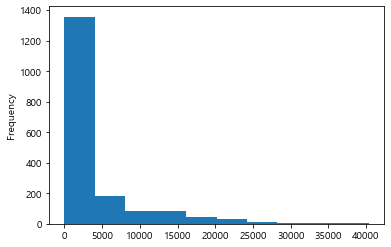

In [87]:
longterm_frgn2['JPN_cnt'].plot.hist()

In [88]:
longterm_frgn2['JPN_cnt'].describe()

count     1806.000000
mean      3395.371162
std       5829.681883
min          0.000000
25%          0.000000
50%          0.000000
75%       4001.387375
max      40372.333900
Name: JPN_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

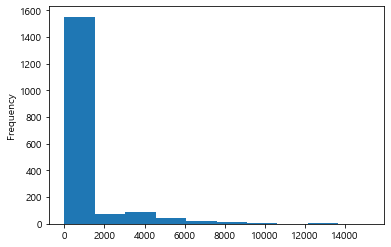

In [89]:
longterm_frgn2['KAZ_cnt'].plot.hist()

In [90]:
longterm_frgn2['KAZ_cnt'].describe()

count     1806.000000
mean       657.761446
std       1802.578193
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15194.979300
Name: KAZ_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

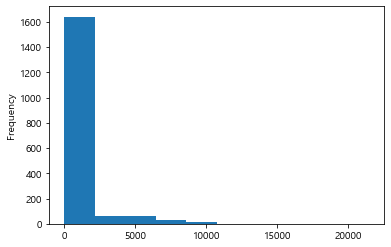

In [91]:
longterm_frgn2['KGZ_cnt'].plot.hist()

In [92]:
longterm_frgn2['KGZ_cnt'].describe()

count     1806.000000
mean       521.027756
std       1789.439060
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      21438.239300
Name: KGZ_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

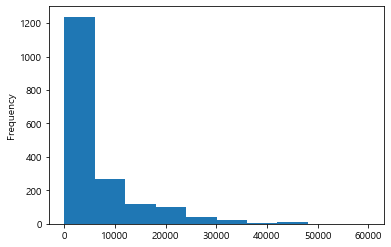

In [93]:
longterm_frgn2['KHM_cnt'].plot.hist()

In [94]:
longterm_frgn2['KHM_cnt'].describe()

count     1806.000000
mean      5627.045546
std       8316.068759
min          0.000000
25%          0.000000
50%       2078.186350
75%       8196.799625
max      60109.928200
Name: KHM_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

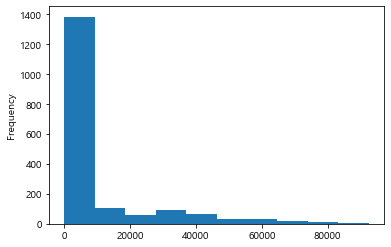

In [95]:
longterm_frgn2['LKA_cnt'].plot.hist()

In [96]:
longterm_frgn2['LKA_cnt'].describe()

count     1806.000000
mean      8880.762836
std      16783.720308
min          0.000000
25%          0.000000
50%          0.000000
75%       8301.949575
max      92497.565500
Name: LKA_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

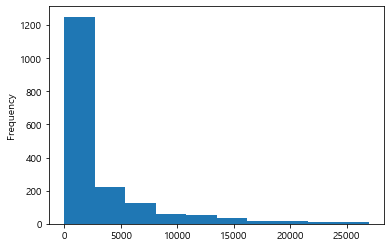

In [97]:
longterm_frgn2['MMR_cnt'].plot.hist()

In [98]:
longterm_frgn2['MMR_cnt'].describe()

count     1806.000000
mean      2760.822480
std       4792.807112
min          0.000000
25%          0.000000
50%          0.000000
75%       3585.118950
max      26960.551900
Name: MMR_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

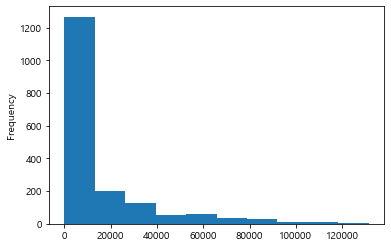

In [99]:
longterm_frgn2['NPL_cnt'].plot.hist()

In [100]:
longterm_frgn2['NPL_cnt'].describe()

count      1806.000000
mean      14279.420598
std       22861.460929
min           0.000000
25%           0.000000
50%        3978.869100
75%       17822.862025
max      131519.783900
Name: NPL_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

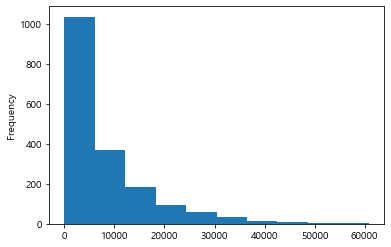

In [101]:
longterm_frgn2['PHL_cnt'].plot.hist()

In [102]:
longterm_frgn2['PHL_cnt'].describe()

count     1806.000000
mean      7561.220226
std       9394.055575
min          0.000000
25%          0.000000
50%       4412.533550
75%      11219.449675
max      60831.056300
Name: PHL_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

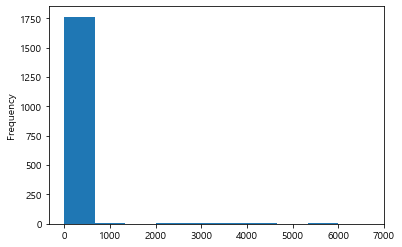

In [103]:
longterm_frgn2['UKR_cnt'].plot.hist()

In [104]:
longterm_frgn2['UKR_cnt'].describe()

count    1806.000000
mean       82.851889
std       574.184531
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      6667.428200
Name: UKR_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

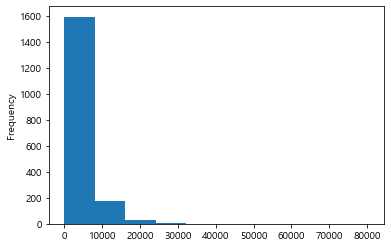

In [105]:
longterm_frgn2['UZB_cnt'].plot.hist()

In [106]:
longterm_frgn2['UZB_cnt'].describe()

count     1806.000000
mean      2455.389868
std       5336.572579
min          0.000000
25%          0.000000
50%          0.000000
75%       3226.275775
max      80470.043700
Name: UZB_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

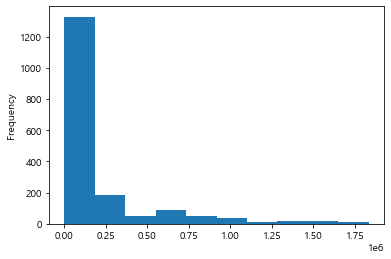

In [107]:
longterm_frgn2['ETC_resd_pop_cnt'].plot.hist()

In [109]:
pd.options.display.float_format = '{:.1f}'.format

In [110]:
longterm_frgn2['ETC_resd_pop_cnt'].describe()

count      1806.0
mean     215021.6
std      322830.4
min         199.8
25%       46180.7
50%       87566.1
75%      197177.5
max     1833069.6
Name: ETC_resd_pop_cnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

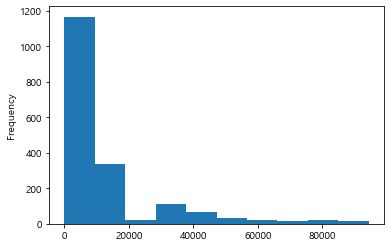

In [111]:
longterm_frgn2['resd_pop_time'].plot.hist()

In [112]:
longterm_frgn2['resd_pop_time'].describe()

count    1806.0
mean    12868.1
std     17307.8
min         6.7
25%      3374.9
50%      5669.0
75%     13019.7
max     94354.6
Name: resd_pop_time, dtype: float64

In [113]:
longterm_frgn2['BGD_cnt'] = np.log(longterm_frgn2['BGD_cnt'] + 1)
longterm_frgn2['DEU_cnt'] = np.log(longterm_frgn2['DEU_cnt'] + 1)
longterm_frgn2['FRA_cnt'] = np.log(longterm_frgn2['FRA_cnt'] + 1)
longterm_frgn2['JPN_cnt'] = np.log(longterm_frgn2['JPN_cnt'] + 1)
longterm_frgn2['KAZ_cnt'] = np.log(longterm_frgn2['KAZ_cnt'] + 1)
longterm_frgn2['KGZ_cnt'] = np.log(longterm_frgn2['KGZ_cnt'] + 1)
longterm_frgn2['KHM_cnt'] = np.log(longterm_frgn2['KHM_cnt'] + 1)
longterm_frgn2['LKA_cnt'] = np.log(longterm_frgn2['LKA_cnt'] + 1)
longterm_frgn2['MMR_cnt'] = np.log(longterm_frgn2['MMR_cnt'] + 1)
longterm_frgn2['NPL_cnt'] = np.log(longterm_frgn2['NPL_cnt'] + 1)
longterm_frgn2['PHL_cnt'] = np.log(longterm_frgn2['PHL_cnt'] + 1)
longterm_frgn2['UKR_cnt'] = np.log(longterm_frgn2['UKR_cnt'] + 1)
longterm_frgn2['UZB_cnt'] = np.log(longterm_frgn2['UZB_cnt'] + 1)
longterm_frgn2['ETC_resd_pop_cnt'] = np.log(longterm_frgn2['ETC_resd_pop_cnt'])
longterm_frgn2['resd_pop_time'] = np.log(longterm_frgn2['resd_pop_time'])

In [120]:
longterm_final = longterm_frgn2.copy()

In [121]:
# longterm_final = longterm_final.dropna(axis = 1).reset_index()

In [122]:
longterm_final['BGD_cnt'] = scaler.fit_transform(longterm_frgn2[['BGD_cnt']])
longterm_final['DEU_cnt'] = scaler.fit_transform(longterm_frgn2[['DEU_cnt']])
longterm_final['FRA_cnt'] = scaler.fit_transform(longterm_frgn2[['FRA_cnt']])
longterm_final['JPN_cnt'] = scaler.fit_transform(longterm_frgn2[['JPN_cnt']])
longterm_final['KAZ_cnt'] = scaler.fit_transform(longterm_frgn2[['KAZ_cnt']])
longterm_final['KGZ_cnt'] = scaler.fit_transform(longterm_frgn2[['KGZ_cnt']])
longterm_final['KHM_cnt'] = scaler.fit_transform(longterm_frgn2[['KHM_cnt']])
longterm_final['LKA_cnt'] = scaler.fit_transform(longterm_frgn2[['LKA_cnt']])
longterm_final['MMR_cnt'] = scaler.fit_transform(longterm_frgn2[['MMR_cnt']])
longterm_final['NPL_cnt'] = scaler.fit_transform(longterm_frgn2[['NPL_cnt']])
longterm_final['PHL_cnt'] = scaler.fit_transform(longterm_frgn2[['PHL_cnt']])
longterm_final['UKR_cnt'] = scaler.fit_transform(longterm_frgn2[['UKR_cnt']])
longterm_final['UZB_cnt'] = scaler.fit_transform(longterm_frgn2[['UZB_cnt']])
longterm_final['ETC_resd_pop_cnt'] = scaler.fit_transform(longterm_frgn2[['ETC_resd_pop_cnt']])
longterm_final['resd_pop_time'] = scaler.fit_transform(longterm_frgn2[['resd_pop_time']])

In [123]:
longterm_final

,year,month,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_resd_pop_cnt,resd_pop_time
0,2018,1,건입동,-0.4,-0.3,-0.4,1.1,-0.4,-0.3,-1.1,1.0,0.6,0.5,0.6,-0.2,-0.7,-0.2,-0.1
1,2018,1,구좌읍,-0.4,-0.3,-0.4,0.9,-0.4,-0.3,1.1,1.3,1.1,1.0,0.8,-0.2,1.3,0.2,0.3
2,2018,1,남원읍,-0.4,-0.3,-0.4,-0.9,-0.4,-0.3,1.2,1.4,1.1,0.9,0.8,-0.2,-0.7,0.0,0.3
3,2018,1,노형동,-0.4,-0.3,2.4,1.5,-0.4,-0.3,1.1,0.9,1.0,0.7,0.6,-0.2,1.1,2.1,2.0
4,2018,1,대륜동,-0.4,3.7,-0.4,1.0,-0.4,-0.3,0.8,-0.9,-0.9,-1.4,0.5,-0.2,-0.7,0.0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,-0.4,-0.3,-0.4,-0.9,-0.4,-0.3,0.8,1.2,0.9,0.7,0.6,-0.2,1.2,-0.1,-0.1
1802,2021,6,한경면,-0.4,4.1,-0.4,0.9,-0.4,-0.3,0.8,1.2,0.7,0.6,0.5,-0.2,0.9,0.4,0.4
1803,2021,6,한림읍,2.2,-0.3,2.6,-0.9,-0.4,-0.3,1.2,1.2,1.5,1.0,0.9,-0.2,-0.7,1.5,1.4
1804,2021,6,화북동,-0.4,-0.3,2.5,1.3,-0.4,-0.3,0.9,0.9,1.1,0.6,0.8,-0.2,1.5,0.2,0.3


In [137]:
longterm_merge = food_waste_month.merge(longterm_final, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [138]:
longterm_merge

,year,month,emd_nm,sum(em_g),BGD_cnt,DEU_cnt,FRA_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_resd_pop_cnt,resd_pop_time
0,2018,1,건입동,0.1,-0.4,-0.3,-0.4,1.1,-0.4,-0.3,-1.1,1.0,0.6,0.5,0.6,-0.2,-0.7,-0.2,-0.1
1,2018,1,남원읍,-0.0,-0.4,-0.3,-0.4,-0.9,-0.4,-0.3,1.2,1.4,1.1,0.9,0.8,-0.2,-0.7,0.0,0.3
2,2018,1,노형동,1.9,-0.4,-0.3,2.4,1.5,-0.4,-0.3,1.1,0.9,1.0,0.7,0.6,-0.2,1.1,2.1,2.0
3,2018,1,대륜동,0.3,-0.4,3.7,-0.4,1.0,-0.4,-0.3,0.8,-0.9,-0.9,-1.4,0.5,-0.2,-0.7,0.0,-0.1
4,2018,1,대정읍,-0.1,-0.4,-0.3,-0.4,-0.9,1.9,-0.3,1.0,1.5,1.1,-1.4,0.9,-0.2,-0.7,1.6,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2021,6,표선면,-0.0,-0.4,-0.3,-0.4,-0.9,-0.4,-0.3,0.8,1.2,0.9,0.7,0.6,-0.2,1.2,-0.1,-0.1
1630,2021,6,한경면,-0.5,-0.4,4.1,-0.4,0.9,-0.4,-0.3,0.8,1.2,0.7,0.6,0.5,-0.2,0.9,0.4,0.4
1631,2021,6,한림읍,0.7,2.2,-0.3,2.6,-0.9,-0.4,-0.3,1.2,1.2,1.5,1.0,0.9,-0.2,-0.7,1.5,1.4
1632,2021,6,화북동,1.0,-0.4,-0.3,2.5,1.3,-0.4,-0.3,0.9,0.9,1.1,0.6,0.8,-0.2,1.5,0.2,0.3


In [140]:
longtermfrgn_x = longterm_merge.loc[:, ['BGD_cnt', 'DEU_cnt', 'FRA_cnt', 'JPN_cnt', 'KAZ_cnt', 'KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt',  'UKR_cnt', 'UZB_cnt', 'ETC_resd_pop_cnt', 'resd_pop_time']]
longtermfrgn_y = longterm_merge.loc[:, ['sum(em_g)']]

In [141]:
longtermfrgn_x = sm.add_constant(longtermfrgn_x)

In [142]:
model = sm.OLS(longtermfrgn_y, longtermfrgn_x)

In [143]:
result = model.fit()

In [144]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sum(em_g)   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     87.01
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.60e-195
Time:                        23:18:48   Log-Likelihood:                -1685.8
No. Observations:                1634   AIC:                             3404.
Df Residuals:                    1618   BIC:                             3490.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0286      0.017      1.657      0.098      -0.005       0.062
BGD_cnt              0.0953      0.020      4.819      0.000       0.056       0.134
DEU_cnt             -0.0533      0.017     -3.157      0.002      -0.086      -0.020
FRA_cnt              0.0648      0.020      3.286      0.001       0.026       0.104
JPN_cnt              0.1962      0.023      8.686      0.000       0.152       0.240
KAZ_cnt              0.0053      0.017      0.303      0.762      -0.029       0.040
KGZ_cnt              0.1413      0.019      7.329      0.000       0.104       0.179
KHM_cnt             -0.0303      0.021     -1.423      0.155      -0.072       0.011
LKA_cnt             -0.1486      0.024     -6.224      0.000      -0.195      -0.102
MMR_cnt             -0.0867      0.022     -3.864      0.000      -0.131      -0.043
NPL_cnt              0.0782      0.023      3.386      0.001       0.033       0.124
PHL_cnt              0.2020      0.024      8.390      0.000       0.155       0.249
UKR_cnt             -0.2338      0.018    -13.084      0.000      -0.269      -0.199
UZB_cnt              0.0339      0.020      1.696      0.090      -0.005       0.073
ETC_resd_pop_cnt     0.6431      0.125      5.149      0.000       0.398       0.888
resd_pop_time       -0.4291      0.149     -2.885      0.004      -0.721      -0.137
==============================================================================
Omnibus:                      272.194   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.236
Skew:                          -0.956   Prob(JB):                    6.79e-129
Kurtosis:                       5.239   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""